A dataset comprises the following predictors (pred1, pred2, pred3, pred4) and the output variable, $y$ (regression_input.csv). This following exercises will assist with a thorough understanding of regression tasks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv('regression_input.csv')

In [3]:
data.head()

,y,pred1,pred2,pred3,pred4
0,0,0,1,0.00,-5
1,10,1,-3,1.58,48
2,20,6,5,1.82,194
3,30,15,15,1.97,443
4,40,18,22,2.09,798


**Explore the data**\
[i*] generate the scatter plots for all predictors and comment on their relationship with the output variable

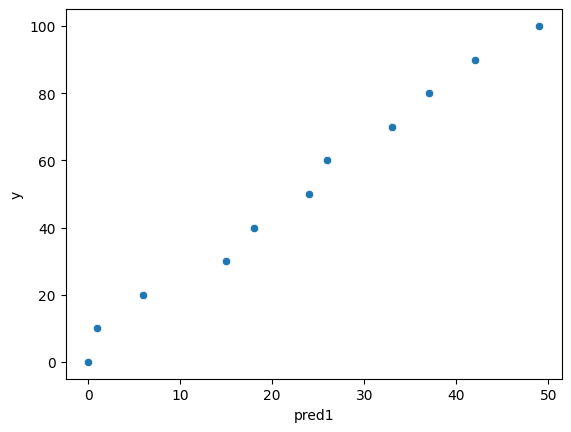

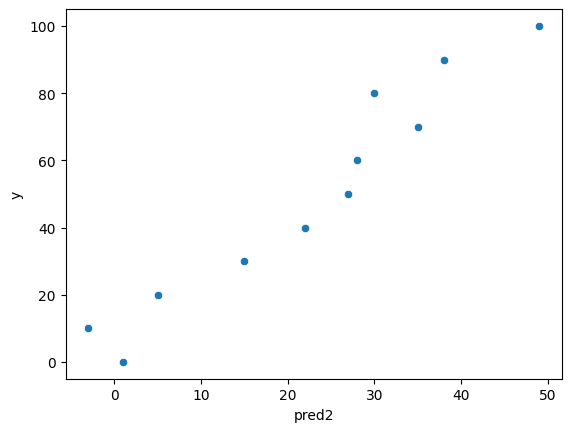

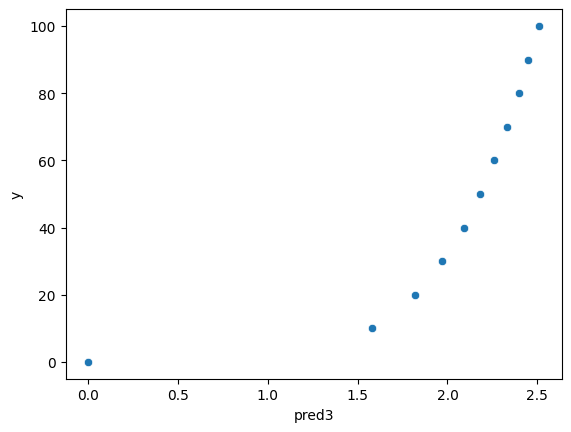

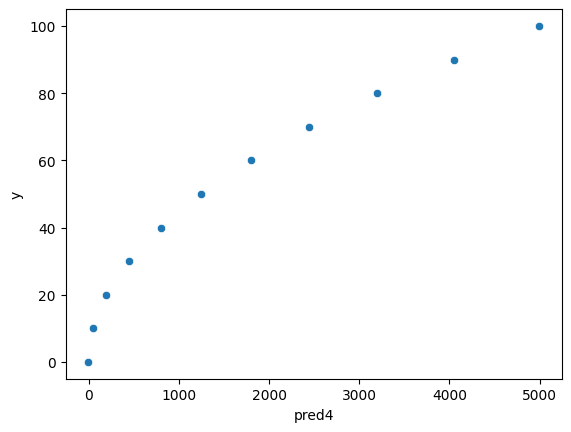

In [4]:
for i in range (1,5):
    sns.scatterplot(x=f'pred{i}', y='y', data=data)
    plt.show()

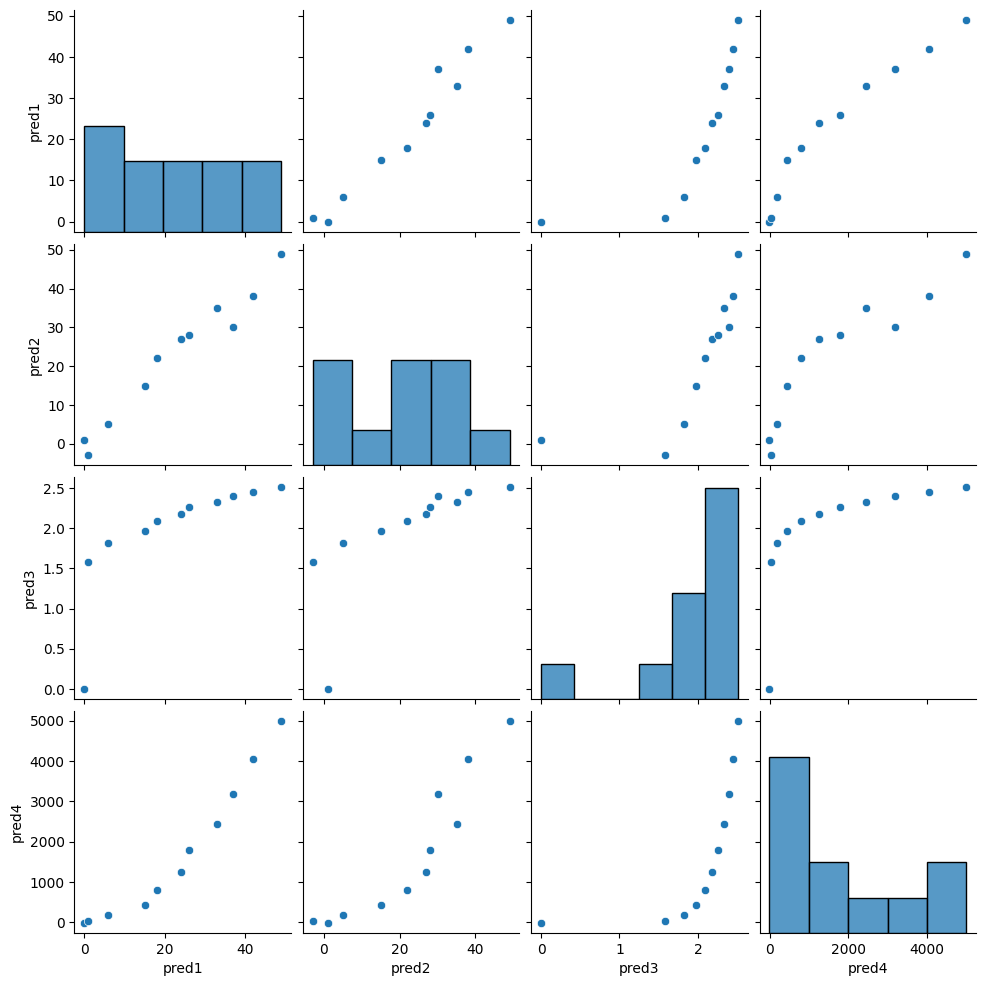

In [5]:
sns.pairplot(data.drop('y', axis=1))
plt.show()

Pred1 and Pred2 are strongly correlated, shall we conside consider PCA? 

**Simple (linear) regression. Assessing the effect of single predictors.**

[ii*] calculate the coefficients and $\mathrm{R}^2$ values for the simple linear regressions for all predictors. Comment the coefficients and $\mathrm{R}^2$ values. Propose a first step for the forward selection.

In [6]:
### Using sklearn model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y = data['y']
for i in range (1,5):
    x = data[f"pred{i}"].to_numpy().reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    print (f"Pred{i}", "R^2:", reg.score(x, y), "k:", reg.coef_[0], "c:", reg.intercept_)



Pred1 R^2: 0.9914067176587962 k: 1.9973395410708346 c: 4.424343199201871
Pred2 R^2: 0.9347022517634291 k: 1.9584237655995662 c: 6.024484536082468
Pred3 R^2: 0.6288047502266398 k: 37.06780413983407 c: -22.75399012536522
Pred4 R^2: 0.9277714129524697 k: 0.018551043466957195 c: 17.606505189698744


The $R^2$ values shows that, for a linear model, the best predictor is pred1, followed by pred2, pred3 and pred3. For a forward selection, we should start with pred1.

In [7]:
import MyModel
import importlib
importlib.reload(MyModel)

<module 'MyModel' from '/Users/zhongjunbao/Documents/Cambridge_Notes/Mphil/mApplied_Data_Science/Supervision/Supervision 1/MyModel.py'>

In [8]:
### Test the model with MSE
for i in range (1,5):
    x = data[f"pred{i}"].to_numpy()
    # here initial_guess is the initial value of the parameters, the length of which is the order +1 
    model = MyModel.MyModel(order = 1, loss_function = "MSE")
    model.fit(x,y)
    print (f"For pred{i}")
    print ("The Coefficient is: ",model.coefficients)
    print ("The total loss is:",model.loss)

For pred1
The Coefficient is:  [4.42434358 1.99733953]
The total loss is: 8.593282341203919
For pred2
The Coefficient is:  [6.02448475 1.95842376]
The total loss is: 65.29774823657081
For pred3
The Coefficient is:  [-22.75402566  37.06782018]
The total loss is: 371.1952497734943
For pred4
The Coefficient is:  [17.60653155  0.01855103]
The total loss is: 72.22858704817533


$\left[i i i^{* *}\right]$ on the simple linear regressions, test a non-linear option. Justify your choice of non-linear function. Generate the evaluation plots for all models.

In [9]:
### Test the model with quadratic function, with order 2 
for i in range (1,5):
    x = data[f"pred{i}"].to_numpy()
    # here initial_guess is the initial value of the parameters, the length of which is the order +1 
    model = MyModel.MyModel(order = 2, loss_function = "MSE")
    model.fit(x,y)
    print (f"For pred{i}")
    print ("The Coefficient is: ",model.coefficients)
    print ("The total loss is:",model.loss)

For pred1
The Coefficient is:  [ 4.18223883e+00  2.03675873e+00 -8.54635128e-04]
The total loss is: 8.5562077286874
For pred2
The Coefficient is:  [7.45292412e+00 1.65942006e+00 7.06710583e-03]
The total loss is: 62.38948762429652
For pred3
The Coefficient is:  [  0.72342007 -60.86524119  39.15103077]
The total loss is: 14.324092389019084
For pred4
The Coefficient is:  [ 9.99373242e+00  3.39081348e-02 -3.34261439e-06]
The total loss is: 20.62718580723236


The result shows that the total loss of pred3 and pred4 decreases drastically, as they have the least non-linear behaviour. 

**Other loss functions**

$[iv^{**}]$ The model initially created focuses on the MSE. Optimise the model using MAE and the Huber Loss.

In [10]:
### Test the model with MAE
for i in range (1,5):
    x = data[f"pred{i}"].to_numpy()
    # here initial_guess is the initial value of the parameters, the length of which is the order +1 
    model = MyModel.MyModel(order = 1, loss_function = "MAE")
    model.fit(x,y)
    print (f"For pred{i}")
    print ("The Coefficient is: ",model.coefficients)
    print ("The total loss is:",model.loss)

For pred1
The Coefficient is:  [0.32038119 2.13522902]
The total loss is: 2.7693234217079823
For pred2
The Coefficient is:  [0.07213552 2.03934417]
The total loss is: 6.734426240592658
For pred3
The Coefficient is:  [ 9.05322767 22.54281961]
The total loss is: 18.816301305586162
For pred4
The Coefficient is:  [2.25021416e+01 1.69251883e-02]
The total loss is: 6.957303310309404


In [11]:
### Test the model with MBE
for i in range (1,5):
    x = data[f"pred{i}"].to_numpy()
    # here initial_guess is the initial value of the parameters, the length of which is the order +1 
    model = MyModel.MyModel(order = 1, loss_function = "Hubber", loss_function_params= {"sigma_": 1})
    print (model.loss_function)
    print (f"For pred{i}")
    print ("The Coefficient is: ",model.coefficients)
    print ("The total loss is:",model.loss)

For pred1
The Coefficient is:  [0, 0]
The total loss is: 0
For pred2
The Coefficient is:  [0, 0]
The total loss is: 0
For pred3
The Coefficient is:  [0, 0]
The total loss is: 0
For pred4
The Coefficient is:  [0, 0]
The total loss is: 0


The total loss seems to be much smaller now, does it justify that MAE and Hubber is better loss function, since it is less biased towards larger values? I don't think it does since MSE is the sum of the square so it is always larger than MAE and Hubber, as long as the differences are smaller than 1.

Qn: instead of choosing a loss function, should we scale the data instead?

**Bias/Variance decomposition**

$\left[\mathrm{v}^{* * *}\right]$ For one of the models, calculate the squared bias, the variance and irreducible error.

In [12]:
### My own model is not robust enough for multiple features, so I will only discuss model with one feature
x = data[f"pred{1}"].to_numpy()
# here initial_guess is the initial value of the parameters, the length of which is the order +1 
model = MyModel.MyModel(order = 1, loss_function = "MSE")
model.fit(x,y)

f_x = model.predict(x)
square_bias = np.mean(f_x - y)**2
variance = np.mean((f_x - [np.mean(f_x)]*len(x))**2)
variance = np.mean(f_x**2) - np.mean(f_x)**2
irreducible_error = model.loss - square_bias - variance




$f_{hat}$ is the prediction, $f$ is the true value that we do not know, we can only estimate it, by averaging the predictions. 

In [13]:
from sklearn.metrics import mean_squared_error
squared_bias = mean_squared_error(y, f_x)
print (square_bias)

2.899556912165007e-15


In [14]:
model.loss, square_bias, variance, irreducible_error

(8.593282341203919,
 2.899556912165007e-15,
 991.4067034651889,
 -982.813421123985)

**Model selection**
**Forward/ Backward greedy approach** 

[vi*] comment the following multiple linear model

Call:

$\operatorname{lm}($ formula $=y \sim \operatorname{pred} 1+\operatorname{pred} 2+\operatorname{pred} 3+\operatorname{pred} 4)$

Residuals :
$$
\begin{array}{rrrrr}
\text { Min } & 1 Q & \text { Median } & 3 Q & \text { Max } \\
-4.0443 & -0.6245 & 0.3889 & 0.8521 & 3.8189
\end{array}
$$

Coefficients:
\begin{align}
    & &&Estimate && \text{Std. Error} && \text{t-value} && \text{{Pr}(>|t|)} \\
    &(Intercept) && -0.237360 && 2.631506 && -0.090 && 0.9311 \\
    &pred1 && 1.613740 && 0.575488 && 2.804 && 0.0310 \\
    &pred2 && -0.134739 && 0.318304 && -0.423 && 0.6868 \\
    &pred3 && 5.372330 && 2.335277 && 2.301 && 0.0611 \\
    &pred4 && 0.003363 && 0.002738 && 1.228 && 0.2653
\end{align}

Coefficients :

Residual standard error: 2.621 on 6 degrees of freedom

Multiple R-squared: 0.9963, Adjusted R-squared: 0.9938

F-statistic: 398.7 on 4 and $6 \mathrm{DF}$, p-value: $2.101 \mathrm{e}-07$

**Answer** 

The t-value of pred1 and pred3 are relatively higher, so they are the top choices for the forward selection

[vii*] investigate full forward selection\
[viii*] investigate full backward selection; comment on convergence\
[ix*] assess interactions between terms

In [15]:
import statsmodels.api as sm

X = sm.add_constant(data['pred1'])

model = sm.OLS(y, X)

results = model.fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.31e-10
Time:                        22:47:00   Log-Likelihood:                -27.439
No. Observations:                  11   AIC:                             58.88
Df Residuals:                       9   BIC:                             59.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4243      1.719      2.574      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [16]:
X = sm.add_constant(data[['pred1','pred3']])

model = sm.OLS(y, X)

results = model.fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     644.4
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.45e-09
Time:                        22:47:00   Log-Likelihood:                -25.616
No. Observations:                  11   AIC:                             57.23
Df Residuals:                       8   BIC:                             58.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0896      2.892      0.031      0.9

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
X = sm.add_constant(data[['pred1','pred2']])

model = sm.OLS(y, X)

results = model.fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     558.7
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           2.55e-09
Time:                        22:47:00   Log-Likelihood:                -26.395
No. Observations:                  11   AIC:                             58.79
Df Residuals:                       8   BIC:                             59.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5524      1.661      2.740      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [18]:
X = sm.add_constant(data[['pred1','pred4']])

model = sm.OLS(y, X)

results = model.fit()

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     472.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           4.96e-09
Time:                        22:47:00   Log-Likelihood:                -27.309
No. Observations:                  11   AIC:                             60.62
Df Residuals:                       8   BIC:                             61.81
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9789      2.204      2.259      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the summary, we can see that pred 1, 3 generates a better model

The interaction between terms can be seen from the pair plot?

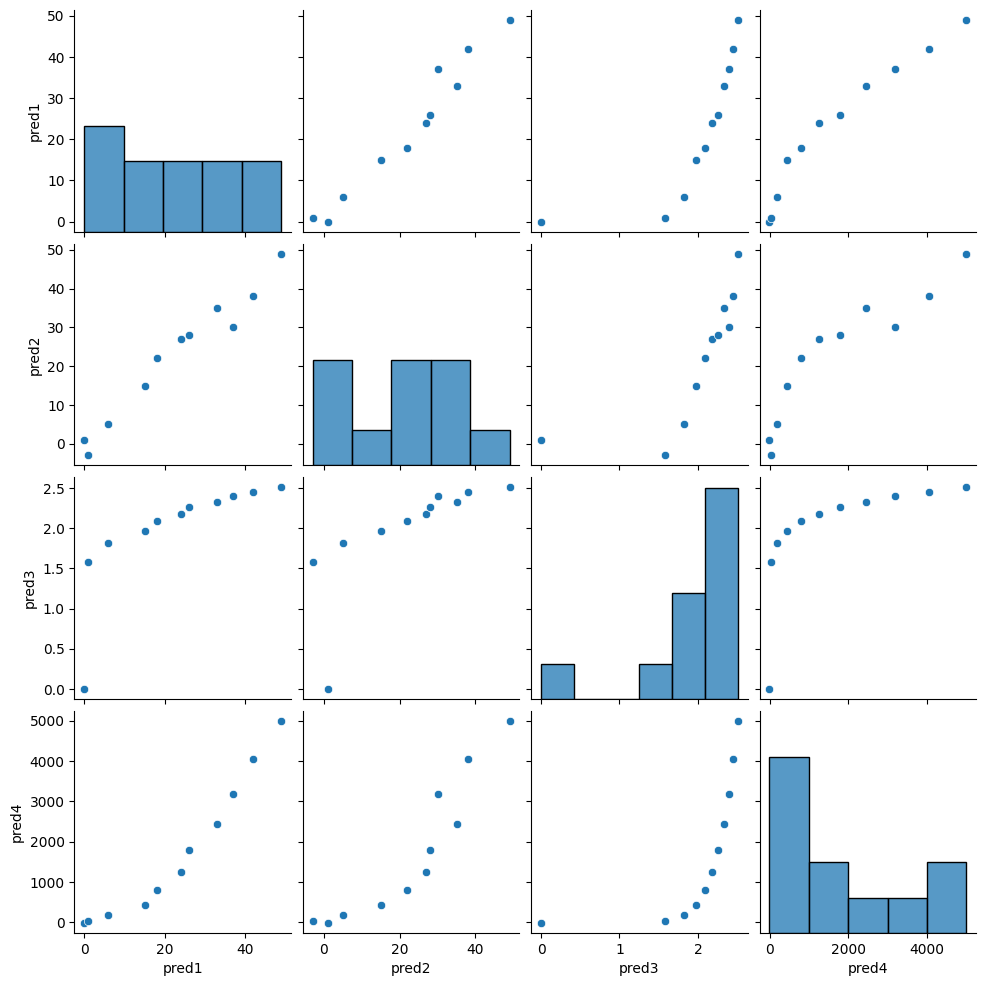

In [19]:
sns.pairplot(data.drop('y', axis=1))
plt.show()

Categorical features

$\left[\mathrm{x}^*\right]$ consider an additional predictor

pred5: $\begin{array}{llllllllllll}0 & 0 & 0 & 1 & 1 & 0 & 1 & 1 & 0 & 1 & 1\end{array}$

Answer (i) and (ii) wrt pred5; generate also the full linear model.


In [20]:
new_df = pd.DataFrame([0,0,0,1,1,0,1,1,0,1,1], columns=['pred5'])
data = pd.concat([data, new_df], axis=1)

In [21]:
data.head()

,y,pred1,pred2,pred3,pred4,pred5
0,0,0,1,0.00,-5,0
1,10,1,-3,1.58,48,0
2,20,6,5,1.82,194,0
3,30,15,15,1.97,443,1
4,40,18,22,2.09,798,1


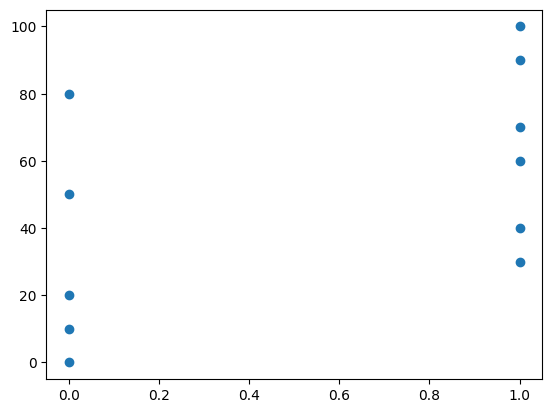

In [22]:
plt.plot(data['pred5'], data['y'], 'o')
plt.show()

Pred5 R^2: 0.27 k: 33.0 c: 32.0


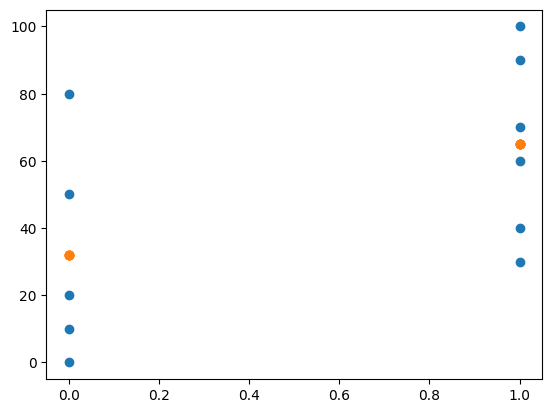

In [23]:
y = data['y']
x = data[f"pred{5}"].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, y)
print (f"Pred{5}", "R^2:", reg.score(x, y), "k:", reg.coef_[0], "c:", reg.intercept_)
y_ = reg.predict(x)

plt.plot(data['pred5'], data['y'], 'o')
plt.plot(data['pred5'], y_, 'o')
plt.show()

Look like a horrible linear model, a logsitic regression might be better? How do we quantify the performance for a logistic regression?

In [24]:
from sklearn.linear_model import LogisticRegression

x = data[f"pred{5}"].to_numpy().reshape(-1, 1)
reg = LogisticRegression().fit(x, y)
predictions = reg.predict(x)




[xi*] consider an additional predictor; what differs (in terms of properties) from pred5

Pred6: $2 \begin{array}{lllllllllll} & 0 & 0 & 0 & 2 & 1 & 3 & 1 & 3 & 1 & 1\end{array}$

Answer (i) and (ii) wrt pred6; generate also the full linear model. Try the forward and backward selection.

Look for interactions. Generate the best possible model for this data.


In [25]:
new_df = pd.DataFrame([2,0,0,0,2,1,3,1,3,1,1], columns=['pred6'])
data = pd.concat([data, new_df], axis=1)

In [26]:
data.head()

,y,pred1,pred2,pred3,pred4,pred5,pred6
0,0,0,1,0.00,-5,0,2
1,10,1,-3,1.58,48,0,0
2,20,6,5,1.82,194,0,0
3,30,15,15,1.97,443,1,0
4,40,18,22,2.09,798,1,2


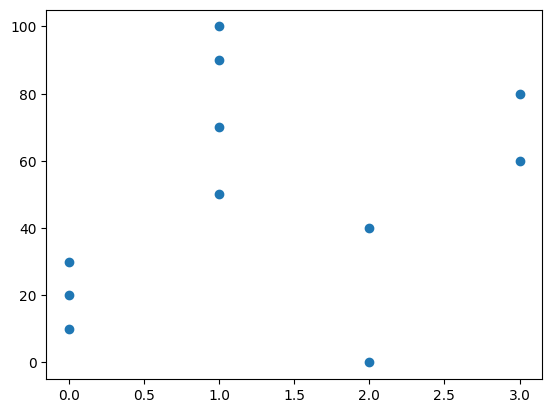

In [27]:
plt.plot(data['pred6'], data['y'], 'o')
plt.show()

In [28]:
y = data['y']
x = data[f"pred{6}"].to_numpy().reshape(-1, 1)
reg = LinearRegression().fit(x, y)
print (f"Pred{6}", "R^2:", reg.score(x, y), "k:", reg.coef_[0], "c:", reg.intercept_)

Pred6 R^2: 0.09029850746268664 k: 9.029850746268655 c: 38.507462686567166


In [29]:
from sklearn.linear_model import LogisticRegression

x = data[f"pred{6}"].to_numpy().reshape(-1, 1)
reg = LogisticRegression().fit(x, y)
print (f"Pred{6}", "R^2:", reg.score(x, y), "k:", reg.coef_[0], "c:", reg.intercept_)


Pred6 R^2: 0.2727272727272727 k: [0.38156689] c: [-0.39968224  0.7841441   0.7841441   0.7841441  -0.39968224  0.28088607
 -1.33830607  0.28088607 -1.33830607  0.28088607  0.28088607]


In [30]:
X = sm.add_constant(data[['pred1','pred2','pred3','pred4','pred5','pred6']])

model = sm.OLS(y, X)
result = model.fit()

print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     393.6
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           1.71e-05
Time:                        22:47:03   Log-Likelihood:                -18.497
No. Observations:                  11   AIC:                             50.99
Df Residuals:                       4   BIC:                             53.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4072      2.599     -1.311      0.2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


pred 1,3,4,6 seems to be a better predictor due to its high t-value. What I do no understand is, pred1 and pred2 are highly related, why is it that pred1 is a better predictor than pred2?

P is the probability of obtaining this result if the Null Hypothesis being true. A low p value means that you should reject Null Hypothesis.

**Regularisation $* * *$**

Assess the effect of ridge, lasso and elastic-net regularisation on the parametric models.

In [31]:
L = MyModel.L2({"lambda_": 7})

print (L.name)
print (L.params)

L2
{'lambda_': 7}


In [32]:
x = data[f"pred{1}"].to_numpy()

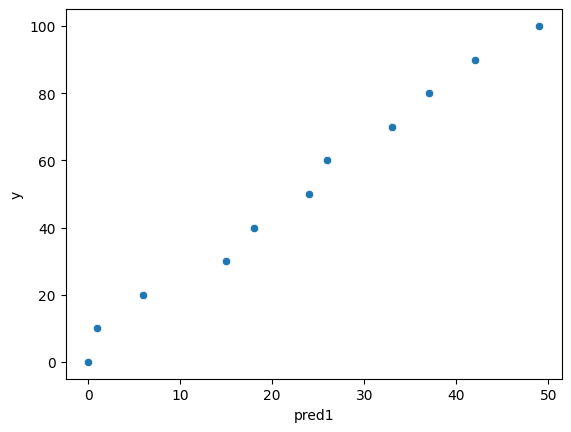

In [33]:
sns.scatterplot(data, x = 'pred1', y = 'y')
plt.show()

14.491616789863285
[0.25480039 2.10190268]
[4.42434358 1.99733953]
8.593282341203919


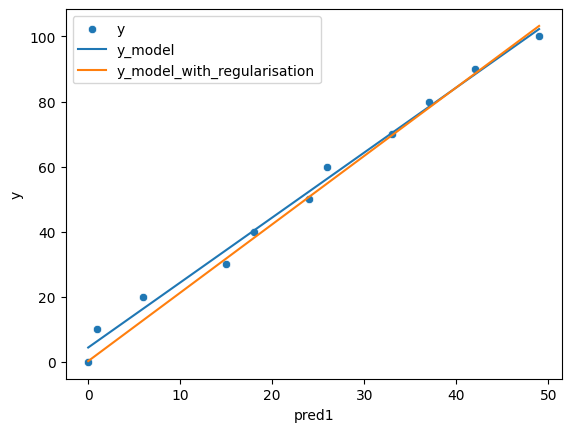

In [34]:
model_R = MyModel.MyModel(order = 1, loss_function = "MSE", regularisation_function = L)

model_R.fit(x,y)

print (model_R.loss)

print (model_R.coefficients)

data["y_hat_R"] = model_R.predict(x)



model = MyModel.MyModel(order = 1, loss_function = "MSE")

model.fit(x,y)

print (model.coefficients)

print (model.loss)

data["y_hat"] = model.predict(x)

sns.scatterplot(data, x = 'pred1', y = 'y', label = 'y')
sns.lineplot(data, x = 'pred1', y = 'y_hat', label = 'y_model')
sns.lineplot(data, x = 'pred1', y = 'y_hat_R', label = 'y_model_with_regularisation')
plt.legend()
plt.show()

The regularisation works, with the intercept now smaller so that total loss function is smaller, at the cost of being a worse fit line.